In [9]:
import pandas as pd

In [10]:
import pickle

In [11]:
p_df = pd.read_pickle(r"C:\Users\srish\Documents\NEU\Parallell ML and AI\Untitled Folder\data\example_pickle.tar\example_pickle\example_pickle")

In [12]:
p_df

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,...,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,stddev_output_idle_time,mean_input_idle_time,stddev_input_idle_time
0,False,17KCKe2Y1G4Yq8n8rxpGfCfAFaeHfe6HbQ,1535760000,1564617600,1541030400,1585699200,28857600,44668800,-21081600,-5270400,...,104885531.000000000,2913486.972222222,1.818265e+06,4,2913486.972222222,1.0,7.899492e+05,6.208239e+05,1.483250e+07,8.952467e+06
1,False,1BBWdYQC8dqbcmX18xFcFtnAibnoQSQHfH,1388534400,1398902400,1391212800,1401580800,10368000,10368000,-2678400,-2678400,...,417604833.000000000,2676954.057692308,2.575962e+06,31,2676954.057692308,1.0,6.073680e+04,2.096533e+05,4.059397e+05,4.389097e+05
2,False,1AzTnHzcG9PTjsnDczrqJWYTkpg6vxSgRs,1504224000,1514764800,1504224000,1514764800,10540800,10540800,0,0,...,507601165.000000000,25380058.250000000,3.775487e+07,19,25380058.250000000,1.0,7.097466e+05,1.567057e+06,7.499310e+05,1.726071e+06
3,False,12bLfmAprxGBVxWJ3ygQByFs31A9joa1hp,1456790400,1496275200,1456790400,1496275200,39484800,39484800,0,0,...,330123219.000000000,5502053.650000000,3.977741e+06,60,5502053.650000000,1.0,6.957878e+05,9.700859e+05,6.804973e+05,9.228746e+05
4,False,1KxBDWvTLncwNLMFUyVCU2QwaUrY2FToE,1472688000,1506816000,1472688000,1506816000,34128000,34128000,0,0,...,1378204470.000000000,5815208.734177215,1.119639e+07,104,5815208.734177215,1.0,1.399946e+05,4.138563e+05,3.209693e+05,5.447932e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010027,False,15CFGNLRjzh17PD5c8NvwbKunqFtV4eTHp,1496275200,1519862400,1496275200,1519862400,23587200,23587200,0,0,...,5650618.000000000,297400.947368421,1.326813e+05,15,297400.947368421,1.0,1.448501e+06,2.938029e+06,2.073995e+06,3.116732e+06
5010028,False,1LrbJDHLBfqkV2rvZYtuYQVY6S7CyxSnPy,1567296000,1577836800,1572566400,1590969600,10540800,18403200,-13132800,-5270400,...,473344.000000000,24912.842105263,5.961492e+03,2,24912.842105263,1.0,6.052822e+05,6.163459e+04,1.879229e+07,NaN
5010029,False,3PXf42gfCZAL1nYZDQcPLJ5A3Af83YXYkQ,1590969600,1590969600,1590969600,1590969600,0,0,0,0,...,14200000.000000000,747368.421052632,3.045186e+05,19,747368.421052632,1.0,6.617000e+04,6.116551e+04,7.173517e+04,7.920090e+04
5010030,False,39fnDUHBJ9CsG9yZH64UCGsmk5FnWw4cHr,1559347200,1564617600,1559347200,1564617600,5270400,5270400,0,0,...,18192777.000000000,957514.578947368,7.207387e+05,19,957514.578947368,1.0,3.522885e+05,2.544391e+05,3.520739e+05,2.566096e+05


In [13]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010032 entries, 0 to 5010031
Data columns (total 30 columns):
is_miner                     bool
address                      object
output_month_min             int64
output_month_max             int64
input_month_min              int64
input_month_max              int64
output_active_time           int64
input_active_time            int64
io_max_lag                   int64
io_min_lag                   int64
output_active_months         int64
total_tx_output_count        int64
total_tx_output_value        object
mean_tx_output_value         object
stddev_tx_output_value       float64
total_output_tx              int64
mean_monthly_output_value    object
mean_monthly_output_count    float64
input_active_months          int64
total_tx_input_count         int64
total_tx_input_value         object
mean_tx_input_value          object
stddev_tx_input_value        float64
total_input_tx               int64
mean_monthly_input_value     object


In [14]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patheffects as PathEffects
import matplotlib.pylab as pylab
import numpy as np
import pandas as pd
import itertools
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time
import seaborn as sns
from keras import utils, optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import binary_crossentropy

Using TensorFlow backend.


In [15]:
p_df.drop(labels = ['stddev_output_idle_time','stddev_input_idle_time'], axis = 1, inplace = True)

In [16]:
p_df.tail(5)

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,...,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
5010027,False,15CFGNLRjzh17PD5c8NvwbKunqFtV4eTHp,1496275200,1519862400,1496275200,1519862400,23587200,23587200,0,0,...,6,19,5650618.000000000,297400.947368421,132681.260484,15,297400.947368421,1.0,1.448501e+06,2.073995e+06
5010028,False,1LrbJDHLBfqkV2rvZYtuYQVY6S7CyxSnPy,1567296000,1577836800,1572566400,1590969600,10540800,18403200,-13132800,-5270400,...,2,19,473344.000000000,24912.842105263,5961.492051,2,24912.842105263,1.0,6.052822e+05,1.879229e+07
5010029,False,3PXf42gfCZAL1nYZDQcPLJ5A3Af83YXYkQ,1590969600,1590969600,1590969600,1590969600,0,0,0,0,...,1,19,14200000.000000000,747368.421052632,304518.601973,19,747368.421052632,1.0,6.617000e+04,7.173517e+04
5010030,False,39fnDUHBJ9CsG9yZH64UCGsmk5FnWw4cHr,1559347200,1564617600,1559347200,1564617600,5270400,5270400,0,0,...,3,19,18192777.000000000,957514.578947368,720738.669685,19,957514.578947368,1.0,3.522885e+05,3.520739e+05
5010031,False,1CfcXjeEynTeRXdpLRzLvkU2nb7c3tmZQ1,1572566400,1583020800,1575158400,1583020800,10454400,7862400,0,-2592000,...,4,19,10374.000000000,546.000000000,0.000000,10,546.000000000,1.0,5.927042e+05,8.557566e+05


In [17]:
p_df.head(5)

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,...,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
0,False,17KCKe2Y1G4Yq8n8rxpGfCfAFaeHfe6HbQ,1535760000,1564617600,1541030400,1585699200,28857600,44668800,-21081600,-5270400,...,4,36,104885531.000000000,2913486.972222222,1.818265e+06,4,2913486.972222222,1.0,789949.200000,1.483250e+07
1,False,1BBWdYQC8dqbcmX18xFcFtnAibnoQSQHfH,1388534400,1398902400,1391212800,1401580800,10368000,10368000,-2678400,-2678400,...,5,156,417604833.000000000,2676954.057692308,2.575962e+06,31,2676954.057692308,1.0,60736.800000,4.059397e+05
2,False,1AzTnHzcG9PTjsnDczrqJWYTkpg6vxSgRs,1504224000,1514764800,1504224000,1514764800,10540800,10540800,0,0,...,4,20,507601165.000000000,25380058.250000000,3.775487e+07,19,25380058.250000000,1.0,709746.555556,7.499310e+05
3,False,12bLfmAprxGBVxWJ3ygQByFs31A9joa1hp,1456790400,1496275200,1456790400,1496275200,39484800,39484800,0,0,...,16,60,330123219.000000000,5502053.650000000,3.977741e+06,60,5502053.650000000,1.0,695787.771930,6.804973e+05
4,False,1KxBDWvTLncwNLMFUyVCU2QwaUrY2FToE,1472688000,1506816000,1472688000,1506816000,34128000,34128000,0,0,...,14,237,1378204470.000000000,5815208.734177215,1.119639e+07,104,5815208.734177215,1.0,139994.555085,3.209693e+05


In [18]:
p_df.shape

(5010032, 28)

In [19]:
# Dropping the non-numeric features
features = p_df.drop(labels = ['is_miner', 'address'], axis = 1)
target = p_df['is_miner'].values
indices = range(len(features))

In [20]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth": 2.5})

In [21]:
def bitcoin_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize = (8, 8))
    ax = plt.subplot(aspect = 'equal')
    sc = ax.scatter(x[:,0], x[:,1], lw = 0, s = 40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.title('t-SNE to visualize features')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize = 24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth = 5, foreground = "w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


In [ ]:
# time_start = time.time()
# RS = 123
# bitcoin_tsne = TSNE(random_state = RS).fit_transform(features)
# print('Time elapsed: {} seconds' .format(time.time() - time_start))

In [22]:
# Splitting the training and testing dataset
x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(features, target, indices,  test_size = 0.2)

In [23]:
x_train.head()

,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,output_active_months,total_tx_output_count,...,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
4632269,1380585600,1380585600,1380585600,1380585600,0,0,0,0,1,2,...,1,2,23403268166.000000000,11701634083.000000000,1.654861e+10,2,11701634083.000000000,1.0,3700.0,3.108000e+03
3106896,1501545600,1501545600,1501545600,1501545600,0,0,0,0,1,2,...,1,2,176236.000000000,88118.000000000,1.680369e+04,2,88118.000000000,1.0,257769.0,1.800600e+04
2641593,1391212800,1391212800,1391212800,1391212800,0,0,0,0,1,2,...,1,2,408500000.000000000,204250000.000000000,2.881460e+08,2,204250000.000000000,1.0,451824.0,4.518240e+05
2426821,1438387200,1441065600,1438387200,1475280000,2678400,36892800,-34214400,0,2,7,...,3,7,61896212.000000000,8842316.000000000,1.141067e+07,4,8842316.000000000,1.0,741641.2,1.261387e+07
651377,1506816000,1543622400,1506816000,1543622400,36806400,36806400,0,0,2,2,...,2,2,60501.000000000,30250.500000000,2.298097e+02,2,30250.500000000,1.0,36213263.0,3.621245e+07


In [24]:
x_train.shape

(4008025, 26)

In [25]:
y_train

array([False, False, False, ..., False, False, False])

In [26]:
# Feature Scaling
sc_x = StandardScaler()
x_train_ann = sc_x.fit_transform(x_train)
x_test_ann = sc_x.transform(x_test)

In [27]:
num_classes = 2

# Hyperparameters
learn_rate = 0.001
batch_size = 500
epochs = 30

In [28]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_train_ann = labelencoder_y.fit_transform(y_train)

# Converting to binary class matrix
y_train_ann = utils.to_categorical(y_train_ann, num_classes)

In [29]:
y_train_ann.shape

(4008025, 2)

In [30]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_test_ann = labelencoder_y.fit_transform(y_test)

# Converting to binary class matrix
y_test_ann = utils.to_categorical(y_test_ann, num_classes)

In [31]:
y_test_ann.shape

(1002007, 2)

In [32]:
seed = 1
np.random.seed(seed)

# Creating model
ann = Sequential()
ann.add(Dense(26, activation = 'tanh', kernel_initializer = 'glorot_uniform'))
ann.add(Dense(11, activation = 'tanh'))
ann.add(Dropout(0.5))
ann.add(Dense(6, activation = 'tanh'))
ann.add(Dense(num_classes, activation = 'softmax'))

In [33]:
rmsprop = optimizers.RMSprop(learn_rate)
ann.compile(loss = 'binary_crossentropy', optimizer = rmsprop, metrics = ['binary_accuracy']) # Compiling the model

In [34]:
 time_start = time.time()
ann.fit(np.array(x_train_ann), y_train_ann, batch_size = batch_size, epochs = epochs, validation_data = (x_test_ann, y_test_ann))
print('Time elapsed: {} seconds' .format(time.time() - time_start))



Train on 4008025 samples, validate on 1002007 samples
Epoch 1/30
4008025/4008025 [==============================] - 55s 14us/step - loss: 0.0115 - binary_accuracy: 0.9967 - val_loss: 0.0062 - val_binary_accuracy: 0.9980
Epoch 2/30
4008025/4008025 [==============================] - 51s 13us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0061 - val_binary_accuracy: 0.9980
Epoch 3/30
4008025/4008025 [==============================] - 34s 8us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0060 - val_binary_accuracy: 0.9980
Epoch 4/30
4008025/4008025 [==============================] - 34s 9us/step - loss: 0.0063 - binary_accuracy: 0.9980 - val_loss: 0.0063 - val_binary_accuracy: 0.9980
Epoch 5/30
4008025/4008025 [==============================] - 34s 9us/step - loss: 0.0063 - binary_accuracy: 0.9980 - val_loss: 0.0059 - val_binary_accuracy: 0.9980
Epoch 6/30
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0064 - binary_accuracy: 0.9980 - v

In [35]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_2 (Dense)              (None, 11)                297       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14        
Total params: 1,085
Trainable params: 1,085
Non-trainable params: 0
_________________________________________________________________


In [36]:
scores = ann.evaluate(x_test_ann, y_test_ann, verbose = 0)
print("Test Accuracy (Artificial Neural Network): {}%" .format(scores[1] * 100))

Test Accuracy (Artificial Neural Network): 99.8039960861206%


In [37]:
scores

[0.00591270173198256, 0.998039960861206]

In [38]:
y_pred = ann.predict(x_test_ann)

# Compute confusion matrix
matrix = confusion_matrix(y_test_ann.argmax(axis = 1), y_pred.argmax(axis = 1)) # Building the confusion matrix

In [39]:
matrix

array([[1000043,       0],
       [   1964,       0]], dtype=int64)

In [40]:
# Training the model
time_start = time.time()
rf = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced')
rf.fit(x_train, y_train)
print('Time elapsed: {} seconds' .format(time.time() - time_start))

Time elapsed: 1411.648386001587 seconds


In [41]:
# Model predictions
y_pred = rf.predict(x_test)
probs = rf.predict_proba(x_test)[:, 1] # Positive class probabilities

In [42]:
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'x-small',
         'axes.titlesize':'small',
         'xtick.labelsize':'x-small',
         'ytick.labelsize':'x-small'}
pylab.rcParams.update(params)

Confusion matrix, without normalization
[[999784    259]
 [  1051    913]]


<Figure size 432x288 with 0 Axes>

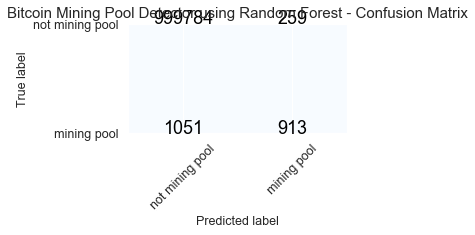

In [43]:
# Confusion matrix code adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    dummy = np.array([[0, 0], [0, 0]])
    plt.figure(figsize = (6, 6))
    plt.imshow(dummy, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['not mining pool', 'mining pool']
np.set_printoptions(precision = 2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, normalize = False, title = 'Bitcoin Mining Pool Detector using Random Forest - Confusion Matrix')

plt.show()

In [44]:
# Calculating Accuracy
acc = (cnf_matrix[0][0] + cnf_matrix[1][1]) / (cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[0][1] + cnf_matrix[1][0])

In [45]:
print("Test Accuracy (Random Forest Classification): {}%" .format(acc * 100))

Test Accuracy (Random Forest Classification): 99.8692623903825%


In [46]:
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'
         }
pylab.rcParams.update(params)

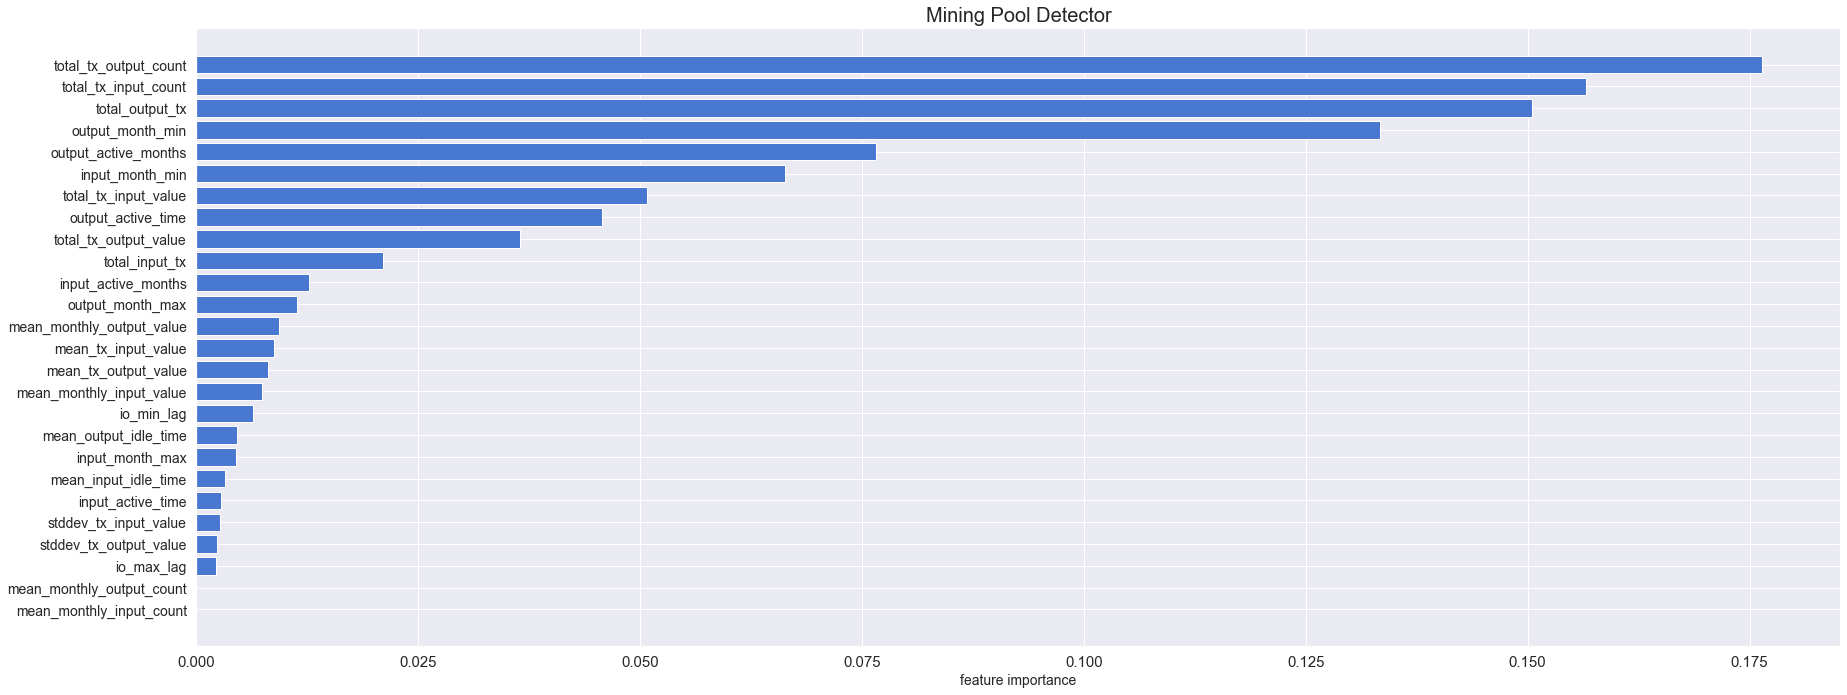

In [47]:
x_pos = np.arange(len(features.columns))
btc_importances = rf.feature_importances_

inds = np.argsort(btc_importances)[::-1]
btc_importances = btc_importances[inds]
cols = features.columns[inds]
bar_width = .8

# How many features to plot?
n_features = 26
x_pos = x_pos[:n_features][::-1]
btc_importances = btc_importances[:n_features]

# Plot
plt.figure(figsize = (26, 10))
plt.barh(x_pos, btc_importances, bar_width, label = 'BTC model')
plt.yticks(x_pos, cols, rotation = 0, fontsize = 14)
plt.xlabel('feature importance', fontsize = 14)
plt.title('Mining Pool Detector', fontsize = 20)
plt.tight_layout()

In [48]:
# Data points where model predicts true, but are labelled as false
false_positives = (y_test == False) & (y_pred == True)

In [49]:
# Subset to test set data only
df_test = p_df.iloc[indices_test, :]

print('False Positive addresses')

# Subset test set to false positives only
df_test.iloc[false_positives].head(15)

False Positive addresses


,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,...,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
513108,False,1Laz1456HAdHX51674aDERE5LYYV4muJwn,1375315200,1391212800,1377993600,1391212800,15897600,13219200,0,-2678400,...,6,216,11239307915.000000000,52033832.939814815,1.051196e+08,26,52033832.939814815,1.0,1.501426e+05,7.779324e+05
2529181,False,1FKyx5bzVaeMSkVDtRZk3otGxjgdZw1LTg,1388534400,1525132800,1388534400,1525132800,136598400,136598400,0,0,...,16,299,4864563333.000000000,16269442.585284281,7.085473e+07,72,16269442.585284281,1.0,4.652907e+05,2.017981e+06
4551482,False,1H3VhcQz6CpHBcucRUP2qXh62p2pGKYPnj,1383264000,1451606400,1385856000,1443657600,68342400,57801600,7948800,-2592000,...,7,359,967845366.000000000,2695948.094707521,3.919115e+06,13,2695948.094707521,1.0,1.843477e+05,5.247424e+06
50813,False,15DnaHG72pGFNuPsCuMxdNB8nNj8QbhE75,1383264000,1396310400,1383264000,1398902400,13046400,15638400,-2592000,0,...,3,42,1797494016.000000000,42797476.571428571,4.275230e+07,7,42797476.571428571,1.0,3.781092e+05,2.726151e+06
513519,False,141QXac72xN6m6Kja5seaPzAE6VRMcMDsD,1396310400,1488326400,1396310400,1488326400,92016000,92016000,0,0,...,24,240,4678474445.000000000,19493643.520833333,3.390329e+07,70,19493643.520833333,1.0,4.023714e+05,1.336495e+06
2546294,False,191jfUQUhyz33oQehE2Lfvg7xGRU5S2oBx,1383264000,1491004800,1385856000,1477958400,107740800,92102400,13046400,-2592000,...,6,390,1120599191.000000000,2873331.258974359,7.050883e+06,9,2873331.258974359,1.0,2.739725e+05,1.179322e+07
2549052,False,1CFkRfYbC7rfdZm9PGtd9Cv4FuNp8Lztnr,1338508800,1388534400,1338508800,1388534400,50025600,50025600,0,0,...,17,158,9588450000.000000000,60686392.405063291,9.939284e+07,150,60686392.405063291,1.0,3.129115e+05,3.276203e+05
2509359,False,1D1XroxMtsJFARbUPajYXUauQHWgC5Dvar,1380585600,1396310400,1383264000,1396310400,15724800,13046400,0,-2678400,...,6,121,3295489296.000000000,27235448.727272727,8.650940e+07,14,27235448.727272727,1.0,1.162778e+05,9.809644e+05
33732,False,13PT69DK8copf1ZkMAujCnu8htzp8WacRP,1322697600,1422748800,1322697600,1488326400,100051200,165628800,-65577600,0,...,16,159,6954965973.000000000,43741924.358490566,7.414583e+07,70,43741924.358490566,1.0,6.331947e+05,2.387872e+06
4546490,False,1HEKbUBi9sdQztJN2k4TRxh7QVRTGYH6nW,1438387200,1462060800,1441065600,1456790400,23673600,15724800,5270400,-2678400,...,3,34,178640044.000000000,5254118.941176471,3.809807e+06,4,5254118.941176471,1.0,5.234346e+05,5.613440e+06


In [50]:
index = inds[: -1]
index

array([ 9, 17, 13,  0,  8,  2, 18,  4, 10, 21, 16,  1, 14, 19, 11, 22,  7,
       24,  3, 25,  5, 20, 12,  6, 15], dtype=int64)

In [51]:
data_top = x_train.columns

In [52]:
xann = pd.DataFrame(data = x_train_ann[0:, 0:], index = [i for i in range(x_train_ann.shape[0])], columns = [str(i) for i in data_top])
xtann = pd.DataFrame(data = x_test_ann[0:, 0:], index = [i for i in range(x_test_ann.shape[0])], columns = [str(i) for i in data_top])
xrf = x_train
xtrf = x_test
i = 1

In [ ]:
ann_acc = [scores[1] * 100]
rf_acc = [acc * 100]
print("{}- All 26 features taken as input:" .format(i))
print("ANN test accuracy = {}%, RF test accuracy = {}%" .format(ann_acc[0], rf_acc[0]))
for x in reversed(index):
    xann = xann.drop(columns = [data_top[x]])	
    xtann = xtann.drop(columns = [data_top[x]])
    xrf = xrf.drop(columns = [data_top[x]])
    xtrf = xtrf.drop(columns = [data_top[x]])
    
    # Creating model
    ann = Sequential()
    ann.add(Dense(26, activation = 'tanh', kernel_initializer = 'glorot_uniform'))
    ann.add(Dense(11, activation = 'tanh'))
    ann.add(Dropout(0.5))
    ann.add(Dense(6, activation = 'tanh'))
    ann.add(Dense(num_classes, activation = 'softmax'))

    rmsprop = optimizers.RMSprop(learn_rate)
    ann.compile(loss = 'binary_crossentropy', optimizer = rmsprop, metrics = ['binary_accuracy']) # Compiling the model

    # Model fitting
    ann.fit(np.array(xann), y_train_ann, batch_size = batch_size, verbose = 0, epochs = epochs)
    scores_ann = ann.evaluate(xtann, y_test_ann, verbose = 0)

    # Training the model
    rf = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced')
    rf.fit(xrf, y_train)

    # Model predictions
    y_pred = rf.predict(xtrf)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    acc = (cnf_matrix[0][0] + cnf_matrix[1][1]) / (cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[0][1] + cnf_matrix[1][0])
    i += 1
    print("{}- Dropping {}:" .format(i, data_top[x]))
    print("ANN test accuracy = {}%, RF test accuracy = {}%" .format(scores_ann[1] * 100, acc * 100))
    ann_acc.append(scores_ann[1] * 100)
    rf_acc.append(acc * 100)

1- All 26 features taken as input:
ANN test accuracy = 99.8039960861206%, RF test accuracy = 99.8692623903825%
2- Dropping mean_monthly_output_count:
ANN test accuracy = 99.8039960861206%, RF test accuracy = 99.87065958621048%
3- Dropping io_max_lag:
ANN test accuracy = 99.80419278144836%, RF test accuracy = 99.87145798382646%


In [ ]:
# Create plots with pre-defined labels
f = plt.figure(figsize = (10, 10))
ax = f.add_subplot(121)
t = list(np.arange(1., 27., 1))
t.reverse()
ax.plot(t, rf_acc, 'r-', label = 'Random Forest')
ax.plot(t, ann_acc, 'b--', label = 'Artificial Neural Network')

legend = ax.legend(loc = 'lower right', shadow = True, fontsize = 'x-small')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C6')
plt.ylabel('Test Accuracy (%)')
plt.xlabel('Number of features')
plt.title('RF vs ANN (Accuracy Comparison)')
plt.show()